# CO2 prediction model

#### Read in data and imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from math import sqrt
from sklearn.metrics import average_precision_score
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
data =  pd.read_csv("data/cleanedData.csv")

#### Need to remove vehicles without CO2 emissions listed

In [3]:
df_NoCO2 = data[data.CO2.isna()]
df_CO2 = data[data.CO2.notnull()]
y_regOnly = (df_CO2[df_CO2['Üldine staatus'] == 'REGISTREERITUD'])['CO2']

#### Make all features numeric

In [4]:
y = df_CO2['CO2']
X = df_CO2.drop(columns=['CO2'])

for (columnName, columnData) in X.iteritems():
    print('Colunm Name : ', columnName)
    uniqueValues = X[columnName].unique()
    print(uniqueValues)
    if ((X[columnName].dtypes == 'object')):
        v = 1
        for value in uniqueValues:
            X.loc[(X[columnName] == value), columnName] = v
            v += 1
        X[columnName] = X[columnName].fillna(0)

for (columnName, columnData) in X.iteritems():
    print('Colunm Name : ', columnName)
    print(X[columnName].unique())
    
#X = pd.get_dummies(X)

Colunm Name :  Üldine staatus
['REGISTREERITUD' 'PEATATUD']
Colunm Name :  Kategooria
['M1' 'M1G']
Colunm Name :  Mark
['ALFA ROMEO' 'ALPINA' 'ALPINE' 'AMG HUMMER' 'ASTON MARTIN' 'AUDI'
 'BENTLEY' 'BMW' 'BUICK' 'CADILLAC' 'CHEVROLET' 'CHRYSLER' 'CITROEN'
 'DACIA' 'DAEWOO' 'DAIHATSU' 'DODGE' 'DONKERVOORT' 'DR MOTOR' 'DS'
 'FERRARI' 'FIAT' 'FISKER' 'FORD' 'GMC' 'HONDA' 'HYUNDAI' 'INFINITI'
 'ISUZU' 'IVECO' 'JAGUAR' 'JEEP' 'KIA' 'LADA' 'LAMBORGHINI' 'LANCIA'
 'LAND ROVER' 'LES DAUPHINS' 'LEXUS' 'LINCOLN' 'LOTUS' 'MAN' 'MASERATI'
 'MAZDA' 'MCC' 'MCLAREN' 'MERCEDES-BENZ' 'MG' 'MIA' 'MICRO-VETT' 'MINI'
 'MITSUBISHI' 'MORGAN' 'NISSAN' 'OMAVALMISTATUD' 'OPEL' 'PEUGEOT'
 'PLYMOUTH' 'PONTIAC' 'PORSCHE' 'RENAULT' 'ROLLS-ROYCE' 'ROVER' 'SAAB'
 'SEAT' 'SHUANGHUAN' 'ŠKODA' 'SMART' 'SSANGYONG' 'SUBARU' 'SUZUKI' 'ZEV'
 'TAZZARI' 'TESLA' 'TOYOTA' 'VAZ' 'VAUXHALL' 'VOLKSWAGEN' 'VOLVO']
Colunm Name :  Mudel
['145' '146' '147' ... 'XC90' 'XC90 T8 TWIN ENGINE'
 'NILSSON V70 AMBULANCE']
Colunm Name :  Keret

#### Split the data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Regressors

#### Linear Regression

LinearRegression MSRE: 17.98179684866122


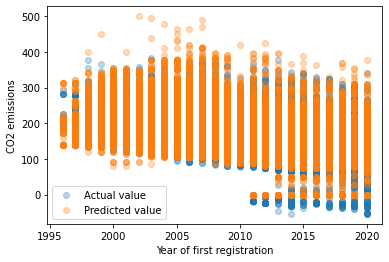

Üldine staatus coefficient: 1.233242466439954
Kategooria coefficient: 12.807292829867569
Mark coefficient: -0.2805302108271657
Mudel coefficient: 0.010750742429368368
Keretüüp coefficient: 1.4182573502273392
Esm reg aasta coefficient: -3.775802992517785
Värv coefficient: 0.05800180636243886
Mootori tüüp coefficient: -21.1015955845537
Mootori maht coefficient: 0.02319080394623563
Mootori võimsus coefficient: 0.03440529633918086
Tühimass coefficient: 0.052377465661633406
Käigukasti tüüp coefficient: 1.8888627418869206
Telgi kokku coefficient: -3.552713678800501e-15
Maakond coefficient: -0.043927728440188114
Linn coefficient: 0.02486092126571622


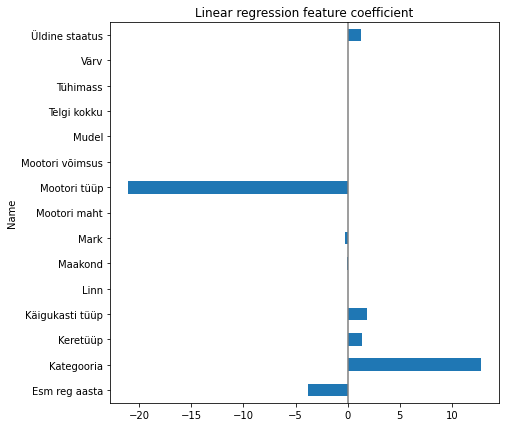

In [6]:
lr = LinearRegression().fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print("LinearRegression MSRE:",mean_squared_error(y_test, lr_pred, squared=False))
plt.scatter(X_test['Esm reg aasta'], lr_pred, marker='o', alpha=0.3);
plt.scatter(X_test['Esm reg aasta'], y_test, marker='o', alpha=0.3);
plt.legend({'Actual value','Predicted value'})
plt.xlabel("Year of first registration")
plt.ylabel("CO2 emissions")
plt.show()

for i in range(len(lr.coef_)):
    print(X.columns[i] + " coefficient:", lr.coef_[i])
    
coef_df = pd.DataFrame({'Name':X.columns, 'coefficient':lr.coef_})

coef_df.groupby("Name")['coefficient'].mean().plot(kind='barh', figsize=(9, 7))
plt.title('Linear regression feature coefficient')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

#### Ridge regression

Ridge MSRE: 17.98179754042531


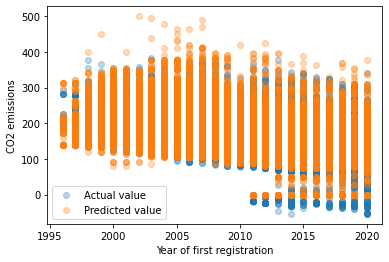

Üldine staatus coefficient: 1.2331209272886205
Kategooria coefficient: 12.806643688175342
Mark coefficient: -0.2805326619590829
Mudel coefficient: 0.010750846830992653
Keretüüp coefficient: 1.41824200450204
Esm reg aasta coefficient: -3.775807100332225
Värv coefficient: 0.058002763071336255
Mootori tüüp coefficient: -21.101473951983127
Mootori maht coefficient: 0.023190788483115815
Mootori võimsus coefficient: 0.034405955771012686
Tühimass coefficient: 0.05237770064212599
Käigukasti tüüp coefficient: 1.8888372532154982
Telgi kokku coefficient: 0.0
Maakond coefficient: -0.04392903363401711
Linn coefficient: 0.024861171632427525


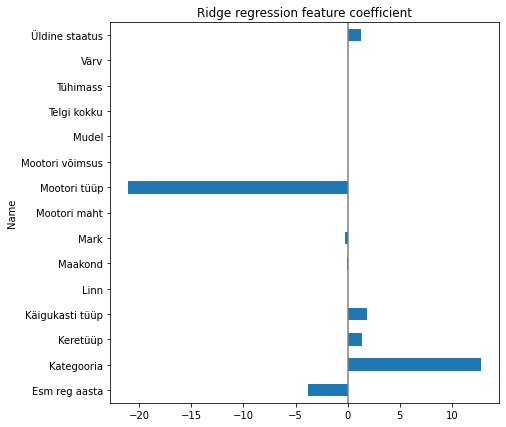

In [7]:
ridge = Ridge().fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
print("Ridge MSRE:",mean_squared_error(y_test, ridge_pred, squared=False))
plt.scatter(X_test['Esm reg aasta'], ridge_pred, marker='o', alpha=0.3);
plt.scatter(X_test['Esm reg aasta'], y_test, marker='o', alpha=0.3);
plt.legend({'Actual value','Predicted value'})
plt.xlabel("Year of first registration")
plt.ylabel("CO2 emissions")
plt.show()

for i in range(len(ridge.coef_)):
    print(X.columns[i] + " coefficient:", ridge.coef_[i])
    
coef_df = pd.DataFrame({'Name':X.columns, 'coefficient':ridge.coef_})

coef_df.groupby("Name")['coefficient'].mean().plot(kind='barh', figsize=(9, 7))
plt.title('Ridge regression feature coefficient')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

#### Lasso regression

Lasso MSRE: 18.384280287893542


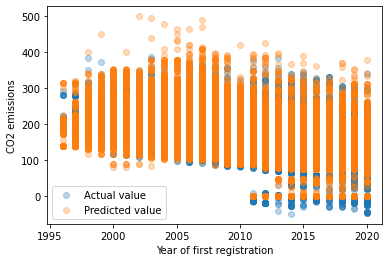

Üldine staatus coefficient: 0.0
Kategooria coefficient: 0.0
Mark coefficient: -0.25703415995518414
Mudel coefficient: 0.010254274526237736
Keretüüp coefficient: 0.6370680886912148
Esm reg aasta coefficient: -3.702386094142301
Värv coefficient: 0.041579311459649375
Mootori tüüp coefficient: -19.348132383900833
Mootori maht coefficient: 0.02412705841340913
Mootori võimsus coefficient: 0.028793045190441447
Tühimass coefficient: 0.05922094794094276
Käigukasti tüüp coefficient: 0.0
Telgi kokku coefficient: 0.0
Maakond coefficient: -0.017719339278070134
Linn coefficient: 0.0


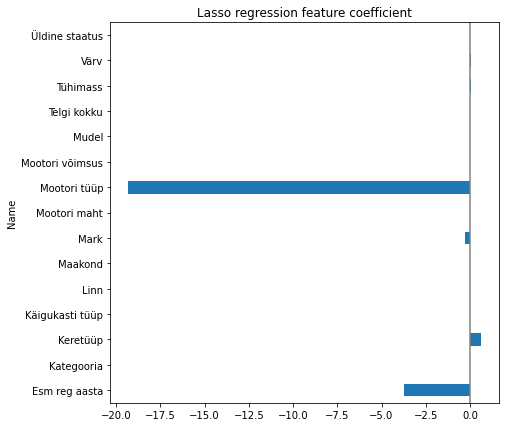

In [8]:
lasso = Lasso().fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
print("Lasso MSRE:",mean_squared_error(y_test, lasso_pred, squared=False))
plt.scatter(X_test['Esm reg aasta'], lasso_pred, marker='o', alpha=0.3);
plt.scatter(X_test['Esm reg aasta'], y_test, marker='o', alpha=0.3);
plt.legend({'Actual value','Predicted value'})
plt.xlabel("Year of first registration")
plt.ylabel("CO2 emissions")
plt.show()

for i in range(len(lasso.coef_)):
    print(X.columns[i] + " coefficient:", lasso.coef_[i])
    
coef_df = pd.DataFrame({'Name':X.columns, 'coefficient':lasso.coef_})

coef_df.groupby("Name")['coefficient'].mean().plot(kind='barh', figsize=(9, 7))
plt.title('Lasso regression feature coefficient')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

#### Decision Tree Regressor

Decision Tree MSRE: 5.195030639725202


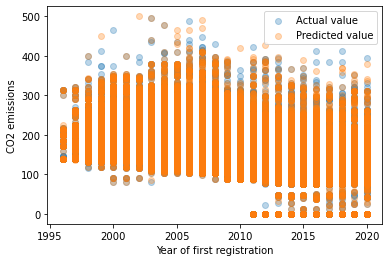

Üldine staatus coefficient: 4.366348448140671e-05
Kategooria coefficient: 0.006486477309498363
Mark coefficient: 0.00615083697135276
Mudel coefficient: 0.018712378602555643
Keretüüp coefficient: 0.012708694810808666
Esm reg aasta coefficient: 0.1808475704273641
Värv coefficient: 0.0008528082729368958
Mootori tüüp coefficient: 0.09217938627401707
Mootori maht coefficient: 0.499547780622421
Mootori võimsus coefficient: 0.06258408278341861
Tühimass coefficient: 0.10479049781205302
Käigukasti tüüp coefficient: 0.013963351701664252
Telgi kokku coefficient: 0.0
Maakond coefficient: 0.0006704754196592889
Linn coefficient: 0.00046199550776900234


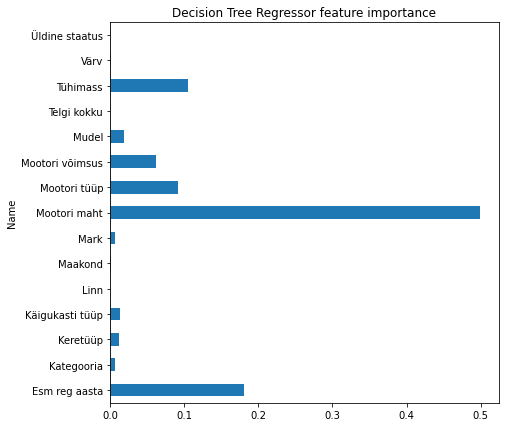

In [9]:
decisionTree = DecisionTreeRegressor(random_state=0).fit(X_train, y_train)
decisionTree_pred = decisionTree.predict(X_test)
print("Decision Tree MSRE:",mean_squared_error(y_test, decisionTree_pred, squared=False))
plt.scatter(X_test['Esm reg aasta'], decisionTree_pred, marker='o', alpha=0.3);
plt.scatter(X_test['Esm reg aasta'], y_test, marker='o', alpha=0.3);
plt.legend({'Actual value','Predicted value'})
plt.xlabel("Year of first registration")
plt.ylabel("CO2 emissions")
plt.show()

for i in range(len(decisionTree.feature_importances_)):
    print(X.columns[i] + " coefficient:", decisionTree.feature_importances_[i])
    
importance_df = pd.DataFrame({'Name':X.columns, 'importance':decisionTree.feature_importances_})
importance_df.groupby("Name")['importance'].mean().plot(kind='barh', figsize=(9, 7))
plt.title('Decision Tree Regressor feature importance')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

#### Random Forest Regressor

Random Forest MSRE: 4.0552115660871895


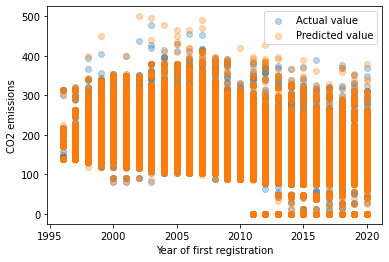

Üldine staatus importance: 7.413125701879741e-05
Kategooria importance: 0.006697352820125721
Mark importance: 0.0065627449224664606
Mudel importance: 0.01963442185866623
Keretüüp importance: 0.012711931747745809
Esm reg aasta importance: 0.18073035120166528
Värv importance: 0.0009390219580911873
Mootori tüüp importance: 0.08393274034107677
Mootori maht importance: 0.5081429261690689
Mootori võimsus importance: 0.06343439261169914
Tühimass importance: 0.10284495436344636
Käigukasti tüüp importance: 0.013078054069967236
Telgi kokku importance: 0.0
Maakond importance: 0.00069203160695509
Linn importance: 0.0005249450720069893


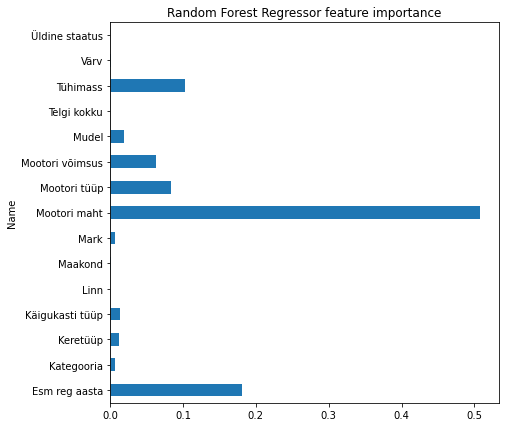

In [10]:
randomForest = RandomForestRegressor(random_state=0).fit(X_train, y_train)
randomForest_pred = randomForest.predict(X_test)
print("Random Forest MSRE:",mean_squared_error(y_test, randomForest_pred, squared=False))
plt.scatter(X_test['Esm reg aasta'], randomForest_pred, marker='o', alpha=0.3);
plt.scatter(X_test['Esm reg aasta'], y_test, marker='o', alpha=0.3);
plt.legend({'Actual value','Predicted value'})
plt.xlabel("Year of first registration")
plt.ylabel("CO2 emissions")
plt.show()

for i in range(len(randomForest.feature_importances_)):
    print(X.columns[i] + " importance:", randomForest.feature_importances_[i])
    
importance_df = pd.DataFrame({'Name':X.columns, 'importance':randomForest.feature_importances_})

importance_df.groupby("Name")['importance'].mean().plot(kind='barh', figsize=(9, 7))
plt.title('Random Forest Regressor feature importance')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

#### Gradient Boosting Regressor

Gradient Boosting Regressor MSRE: 12.6959365740588


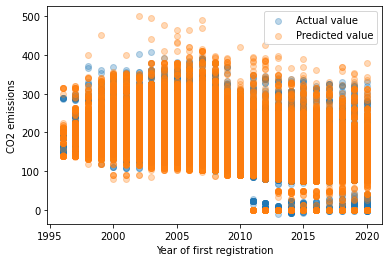

Üldine staatus coefficient: 2.949002418173627e-05
Kategooria coefficient: 0.011283519461984895
Mark coefficient: 0.0037127912459052324
Mudel coefficient: 0.005088953048242102
Keretüüp coefficient: 0.008508104901315611
Esm reg aasta coefficient: 0.21592896006730453
Värv coefficient: 2.0767118196390978e-07
Mootori tüüp coefficient: 0.0976105143346222
Mootori maht coefficient: 0.5130103189928302
Mootori võimsus coefficient: 0.0211424973465399
Tühimass coefficient: 0.11406003579066189
Käigukasti tüüp coefficient: 0.009624607115229658
Telgi kokku coefficient: 0.0
Maakond coefficient: 0.0
Linn coefficient: 0.0


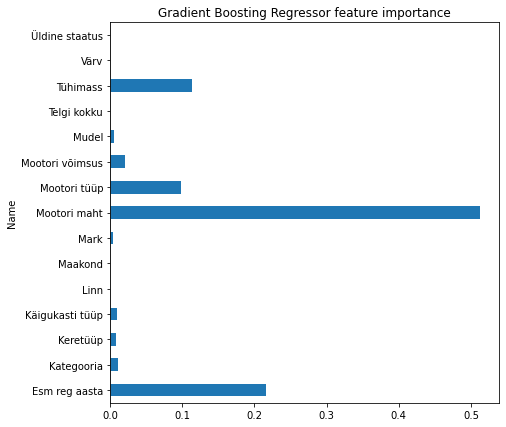

In [11]:
gradientBoostingReg = GradientBoostingRegressor(random_state=0).fit(X_train, y_train)
gradientBoostingReg_pred = gradientBoostingReg.predict(X_test)
print("Gradient Boosting Regressor MSRE:",mean_squared_error(y_test, gradientBoostingReg_pred, squared=False))
plt.scatter(X_test['Esm reg aasta'], gradientBoostingReg_pred, marker='o', alpha=0.3);
plt.scatter(X_test['Esm reg aasta'], y_test, marker='o', alpha=0.3);
plt.legend({'Actual value','Predicted value'})
plt.xlabel("Year of first registration")
plt.ylabel("CO2 emissions")
plt.show()

for i in range(len(gradientBoostingReg.feature_importances_)):
    print(X.columns[i] + " coefficient:", gradientBoostingReg.feature_importances_[i])
    
importance_df = pd.DataFrame({'Name':X.columns, 'importance':gradientBoostingReg.feature_importances_})

importance_df.groupby("Name")['importance'].mean().plot(kind='barh', figsize=(9, 7))
plt.title('Gradient Boosting Regressor feature importance')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

#### Voting Regressor

Voting Regressor MSRE: 5.748205645019943


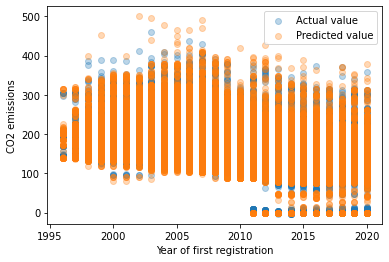

In [12]:
votingReg = VotingRegressor(estimators=[('gb', gradientBoostingReg), ('rf', randomForest), ('des', decisionTree)]).fit(X_train, y_train)
votingReg_pred = votingReg.predict(X_test)
print("Voting Regressor MSRE:",mean_squared_error(y_test, votingReg_pred, squared=False))
plt.scatter(X_test['Esm reg aasta'], votingReg_pred, marker='o', alpha=0.3);
plt.scatter(X_test['Esm reg aasta'], y_test, marker='o', alpha=0.3);
plt.legend({'Actual value','Predicted value'})
plt.xlabel("Year of first registration")
plt.ylabel("CO2 emissions")
plt.show()

### Predicting the CO2 emissions of the vehicles that did not have it listed in the dataset
We use the best classifier found and train it on the whole dataset. Then use it to predict the CO2 emission for all the vehicles without CO2 listed.

In [13]:
X2 = df_NoCO2.drop(columns=['CO2'])
y2 = df_NoCO2['CO2']

In [14]:
for (columnName, columnData) in X2.iteritems():
    print('Colunm Name : ', columnName)
    uniqueValues = X2[columnName].unique()
    print(uniqueValues)
    if ((X2[columnName].dtypes == 'object')):
        v = 1
        for value in uniqueValues:
            X2.loc[(X2[columnName] == value), columnName] = v
            v += 1
        X2[columnName] = X2[columnName].fillna(0)

for (columnName, columnData) in X2.iteritems():
    print('Colunm Name : ', columnName)
    print(X[columnName].unique())
   

Colunm Name :  Üldine staatus
['PEATATUD' 'REGISTREERITUD']
Colunm Name :  Kategooria
['M1' 'M1G']
Colunm Name :  Mark
['ACURA' 'ALFA ROMEO' 'ALPINA' 'AMG HUMMER' 'ASIA' 'ASTON MARTIN' 'AUDI'
 'BENTLEY' 'BINZ' 'BMW' 'BUICK' 'CADILLAC' 'CHALLENGER' 'CHAUSSON TRIGANO'
 'CHEVROLET' 'CHRYSLER' 'CITROEN' 'CONCORDE' 'DACIA' 'DAEWOO' 'DAIHATSU'
 'DAIMLER' 'DODGE' 'EAGLE' 'FERRARI' 'FIAT' 'FORD' 'FREIGHTLINER DAMON'
 'GAZ' 'GEELY' 'GMC' 'HONDA' 'HYUNDAI' 'INFINITI' 'ISUZU' 'IVECO' 'JAGUAR'
 'JEEP' 'KIA' 'KNAUS' 'LADA' 'LAMBORGHINI' 'LANCIA' 'LAND ROVER' 'LEXUS'
 'LINCOLN' 'LOTUS' 'MAN' 'MASERATI' 'MAZDA' 'MAYBACH' 'MCC'
 'MERCEDES-BENZ' 'MERCURY' 'MG' 'MIDAS' 'MINI' 'MITSUBISHI' 'NISSAN'
 'OLDSMOBILE' 'OMAVALMISTATUD' 'OPEL' 'PEUGEOT' 'PLYMOUTH' 'PONTIAC'
 'PORSCHE' 'PROTON' 'PUCH' 'RENAULT' 'REX' 'ROADMASTER HOLIDAY RAMBLER'
 'ROLLS-ROYCE' 'ROVER' 'SAAB' 'SANTANA' 'SATURN' 'SCANIA' 'SCION' 'SEAZ'
 'SEAT' 'ŠKODA' 'SMART' 'SSANGYONG' 'SUBARU' 'SUN LIVING' 'SUZUKI' 'ZAZ'
 'ZHONGHUA' 'TACCOL' 'TE

Colunm Name :  Telgi kokku
[2. 3.]
Colunm Name :  Maakond
['HARJU MAAKOND' 'PÄRNU MAAKOND' 'MÄÄRAMATA' 'TARTU MAAKOND'
 'JÕGEVA MAAKOND' 'IDA-VIRU MAAKOND' 'VILJANDI MAAKOND' 'PÕLVA MAAKOND'
 'JÄRVA MAAKOND' 'LÄÄNE MAAKOND' 'LÄÄNE-VIRU MAAKOND' 'SAARE MAAKOND'
 'VÕRU MAAKOND' 'RAPLA MAAKOND' 'HIIU MAAKOND' 'VALGA MAAKOND']
Colunm Name :  Linn
['Tallinn' 'Pärnu linn' nan 'Tartu linn' 'Kohtla-Järve linn'
 'Haapsalu linn' 'Loksa linn' 'Narva linn' 'Võru linn' 'Paide linn'
 'Narva-Jõesuu linn' 'Rakvere linn' 'Viljandi linn' 'Maardu linn'
 'Sillamäe linn' 'Keila linn']
Colunm Name :  Üldine staatus
[1 2]
Colunm Name :  Kategooria
[1 2]
Colunm Name :  Mark
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79]
Colunm Name :  Mudel
[   1    2    3 ... 2175 2176 2177]
Colunm Name :  Keretüüp
[ 1  2  3  4  5  6

In [15]:
randomForest = RandomForestRegressor(random_state=0).fit(X, y)

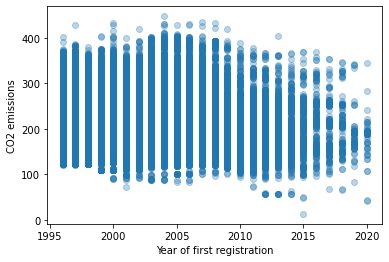

Üldine staatus importance: 6.936136448348433e-05
Kategooria importance: 0.006931737288246767
Mark importance: 0.00672184211500198
Mudel importance: 0.02001907806556333
Keretüüp importance: 0.01267426542950338
Esm reg aasta importance: 0.181170199199893
Värv importance: 0.000871755321833607
Mootori tüüp importance: 0.08261487131042129
Mootori maht importance: 0.508049919494058
Mootori võimsus importance: 0.06363770615369209
Tühimass importance: 0.10304323874882997
Käigukasti tüüp importance: 0.013045094059202423
Telgi kokku importance: 0.0
Maakond importance: 0.0006607790648013843
Linn importance: 0.0004901523844695275


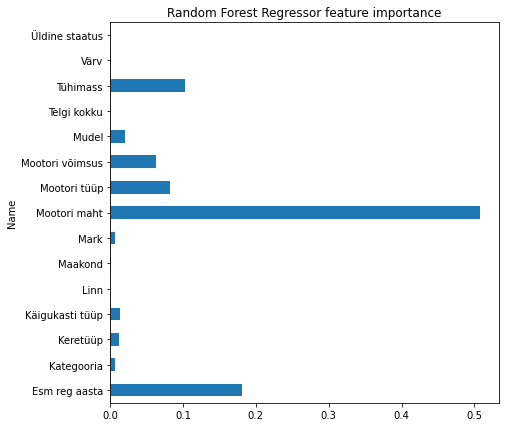

In [16]:
randomForest_pred = randomForest.predict(X2)

plt.scatter(X2['Esm reg aasta'], randomForest_pred, marker='o', alpha=0.3);
#plt.scatter(X['Esm reg aasta'], y, marker='o', alpha=0.3);
#plt.legend({'Actual value','Predicted value'})
plt.xlabel("Year of first registration")
plt.ylabel("CO2 emissions")
plt.show()

for i in range(len(randomForest.feature_importances_)):
    print(X.columns[i] + " importance:", randomForest.feature_importances_[i])
    
importance_df = pd.DataFrame({'Name':X.columns, 'importance':randomForest.feature_importances_})

importance_df.groupby("Name")['importance'].mean().plot(kind='barh', figsize=(9, 7))
plt.title('Random Forest Regressor feature importance')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

In [17]:
prediction_df = pd.DataFrame({'Predicted CO2':randomForest_pred})
print("Mean of the predicted CO2 of vehicles without listed CO2:",prediction_df.mean())
print("Mean of the CO2 emissions:", y.mean())
print("Difference:", prediction_df.mean()-y.mean())

Mean of the predicted CO2 of vehicles without listed CO2: Predicted CO2    206.410609
dtype: float64
Mean of the CO2 emissions: 164.05875054376824
Difference: Predicted CO2    42.351858
dtype: float64


#### Lets find the CO2 data for only vehicles with an active registration.

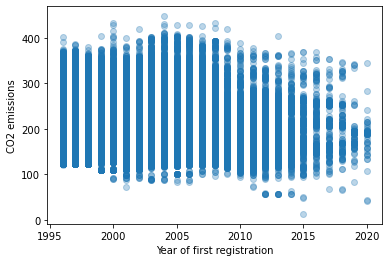

Üldine staatus importance: 6.936136448348433e-05
Kategooria importance: 0.006931737288246767
Mark importance: 0.00672184211500198
Mudel importance: 0.02001907806556333
Keretüüp importance: 0.01267426542950338
Esm reg aasta importance: 0.181170199199893
Värv importance: 0.000871755321833607
Mootori tüüp importance: 0.08261487131042129
Mootori maht importance: 0.508049919494058
Mootori võimsus importance: 0.06363770615369209
Tühimass importance: 0.10304323874882997
Käigukasti tüüp importance: 0.013045094059202423
Telgi kokku importance: 0.0
Maakond importance: 0.0006607790648013843
Linn importance: 0.0004901523844695275


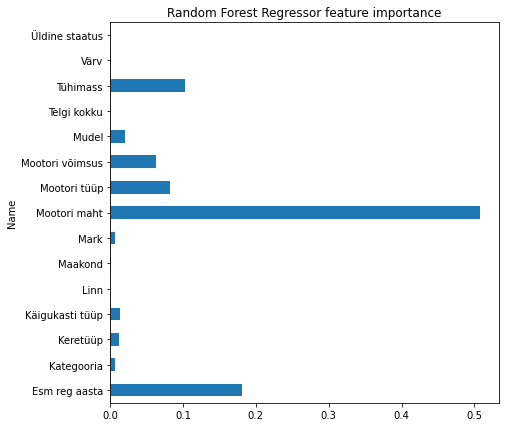

In [18]:
X3 = X2[X2['Üldine staatus'] == 2]
randomForest_pred = randomForest.predict(X3)

plt.scatter(X3['Esm reg aasta'], randomForest_pred, marker='o', alpha=0.3);
#plt.scatter(X['Esm reg aasta'], y, marker='o', alpha=0.3);
#plt.legend({'Actual value','Predicted value'})
plt.xlabel("Year of first registration")
plt.ylabel("CO2 emissions")
plt.show()

for i in range(len(randomForest.feature_importances_)):
    print(X3.columns[i] + " importance:", randomForest.feature_importances_[i])
    
importance_df = pd.DataFrame({'Name':X3.columns, 'importance':randomForest.feature_importances_})

importance_df.groupby("Name")['importance'].mean().plot(kind='barh', figsize=(9, 7))
plt.title('Random Forest Regressor feature importance')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

In [19]:
prediction_df = pd.DataFrame({'Only registered CO2':randomForest_pred})
print("Mean of the predicted CO2 of vehicles without listed CO2 (registered only):",prediction_df.mean())
print("Mean of the CO2 emissions (registered only):", y_regOnly.mean())
print("Difference:", prediction_df.mean()-y_regOnly.mean())

Mean of the predicted CO2 of vehicles without listed CO2 (registered only): Only registered CO2    205.701836
dtype: float64
Mean of the CO2 emissions (registered only): 163.40870136966828
Difference: Only registered CO2    42.293134
dtype: float64


In [20]:
list1 = y_regOnly.to_list()
list2 = prediction_df['Only registered CO2'].to_list()
combinedList = list1 + list2

combinedAvg = sum(combinedList)/len(combinedList)
print("The average of the combined CO2 emissions of only registered:", combinedAvg, "g/km")
print("Mean of the listed registered vehicles CO2 emissions:", y_regOnly.mean(), "g/km")
print("The average raised by:", combinedAvg-y_regOnly.mean(), "g/km")

The average of the combined CO2 emissions of only registered: 173.00183552270278 g/km
Mean of the listed registered vehicles CO2 emissions: 163.40870136966828 g/km
The average raised by: 9.593134153034498 g/km


## Getting the most important feature for predicting each county
Predicting the county of registration based on other features

#### Getting the data

In [21]:
df_Maakonnad = ((data[data.Maakond.notnull()])[data.CO2.notnull()]).drop(columns='Linn')

ym = df_Maakonnad['Maakond']
Xm = (df_Maakonnad.drop(columns=['Maakond']))


for (columnName, columnData) in Xm.iteritems():
    print('Colunm Name : ', columnName)
    uniqueValues = Xm[columnName].unique()
    print(uniqueValues)
    if ((Xm[columnName].dtypes == 'object')):
        v = 1
        for value in uniqueValues:
            Xm.loc[(Xm[columnName] == value), columnName] = v
            v += 1
        Xm[columnName] = Xm[columnName].fillna(0)

for (columnName, columnData) in Xm.iteritems():
    print('Colunm Name : ', columnName)
    print(Xm[columnName].unique())
    

Colunm Name :  Üldine staatus
['REGISTREERITUD' 'PEATATUD']
Colunm Name :  Kategooria
['M1' 'M1G']
Colunm Name :  Mark
['ALFA ROMEO' 'ALPINA' 'ALPINE' 'AMG HUMMER' 'ASTON MARTIN' 'AUDI'
 'BENTLEY' 'BMW' 'BUICK' 'CADILLAC' 'CHEVROLET' 'CHRYSLER' 'CITROEN'
 'DACIA' 'DAEWOO' 'DAIHATSU' 'DODGE' 'DONKERVOORT' 'DR MOTOR' 'DS'
 'FERRARI' 'FIAT' 'FISKER' 'FORD' 'GMC' 'HONDA' 'HYUNDAI' 'INFINITI'
 'ISUZU' 'IVECO' 'JAGUAR' 'JEEP' 'KIA' 'LADA' 'LAMBORGHINI' 'LANCIA'
 'LAND ROVER' 'LES DAUPHINS' 'LEXUS' 'LINCOLN' 'LOTUS' 'MAN' 'MASERATI'
 'MAZDA' 'MCC' 'MCLAREN' 'MERCEDES-BENZ' 'MG' 'MIA' 'MICRO-VETT' 'MINI'
 'MITSUBISHI' 'MORGAN' 'NISSAN' 'OMAVALMISTATUD' 'OPEL' 'PEUGEOT'
 'PLYMOUTH' 'PONTIAC' 'PORSCHE' 'RENAULT' 'ROLLS-ROYCE' 'ROVER' 'SAAB'
 'SEAT' 'SHUANGHUAN' 'ŠKODA' 'SMART' 'SSANGYONG' 'SUBARU' 'SUZUKI' 'ZEV'
 'TAZZARI' 'TESLA' 'TOYOTA' 'VAZ' 'VAUXHALL' 'VOLKSWAGEN' 'VOLVO']
Colunm Name :  Mudel
['145' '146' '147' ... 'XC90' 'XC90 T8 TWIN ENGINE'
 'NILSSON V70 AMBULANCE']
Colunm Name :  Keret

Colunm Name :  Telgi kokku
[2.]
Colunm Name :  Üldine staatus
[1 2]
Colunm Name :  Kategooria
[1 2]
Colunm Name :  Mark
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79]
Colunm Name :  Mudel
[   1    2    3 ... 2175 2176 2177]
Colunm Name :  Keretüüp
[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
Colunm Name :  Esm reg aasta
[1999. 2000. 2002. 2005. 2003. 2006. 2007. 2004. 2009. 2008. 2001. 2011.
 2010. 2012. 2013. 2017. 2018. 2020. 2019. 2016. 2014. 2015. 1998. 1997.
 1996.]
Colunm Name :  Värv
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28]
Colunm Name :  Mootori tüüp
[1 2 3 4 5 6 7 8]
Colunm Name :  CO2
[195. 187. 155. 194. 157. 211. 153. 175. 178. 205. 160. 159. 221. 179.
 217. 210. 189. 138. 286. 270. 181. 289. 235. 199. 310. 198. 284. 212.
 280. 293. 219. 193

In [22]:
X_train, X_test, y_train, y_test = train_test_split(Xm, ym, test_size=0.3, random_state=0)

#### Making the classifier

Random Forest Accuracy: 0.38383239521129175
Üldine staatus importance: 0.009279908117298629
Kategooria importance: 0.002413427168191598
Mark importance: 0.022157407141199622
Mudel importance: 0.05080203297026229
Keretüüp importance: 0.022131033357843544
Esm reg aasta importance: 0.18244367085649046
Värv importance: 0.329230080262268
Mootori tüüp importance: 0.006511220238940308
CO2 importance: 0.09397687560870566
Mootori maht importance: 0.0282504061949632
Mootori võimsus importance: 0.04625346740991421
Tühimass importance: 0.19670931169591394
Käigukasti tüüp importance: 0.009841158978008554
Telgi kokku importance: 0.0


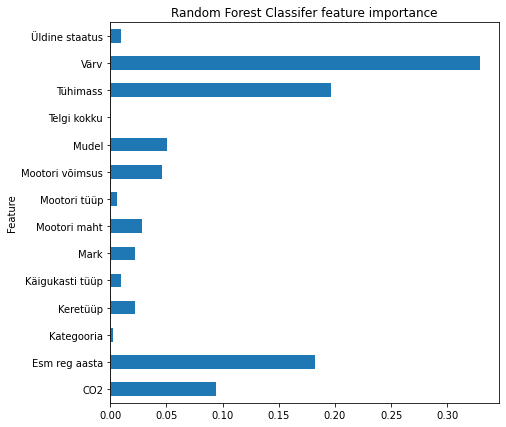

In [23]:
randomForest = RandomForestClassifier(random_state=0).fit(X_train, y_train)
randomForest_pred = randomForest.predict(X_test)
print("Random Forest Accuracy:",accuracy_score(y_test, randomForest_pred))

for i in range(len(randomForest.feature_importances_)):
    print(Xm.columns[i] + " importance:", randomForest.feature_importances_[i])
    
importance_df = pd.DataFrame({'Feature':Xm.columns, 'importance':randomForest.feature_importances_})

importance_df.groupby("Feature")['importance'].mean().plot(kind='barh', figsize=(9, 7))
plt.title('Random Forest Classifer feature importance')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

## The rest of the file is just old code that is not in use any more, can be ignored. It just there to show some of the other things we tried

#### Logistic Regressor

logisticRegression = LogisticRegression(random_state=0).fit(X_train, y_train)
logisticRegression_pred = logisticRegression.predict(X_test)
print("Logistic Regression MSRE:",mean_squared_error(y_test, logisticRegression_pred, squared=False))
plt.scatter(X_test['Esm reg aasta'], logisticRegression_pred, marker='o', alpha=0.3);
plt.scatter(X_test['Esm reg aasta'], y_test, marker='o', alpha=0.3);
plt.legend({'Actual value','Predicted value'})
plt.xlabel("Year of first registration")
plt.ylabel("CO2 emissions")
plt.show()

for i in range(len(logisticRegression.feature_importances)):
    print(X.columns[i] + " coefficient:", logisticRegression.feature_importances[i])

def get_best_alpha(model,X,y,alphas):
    kf = KFold(n_splits=3, random_state = 0, shuffle=False)
    results = []
    for alpha in alphas:
        model.set_params(alpha=alpha)
        for train_indexes, test_indexes in kf.split(X):
            X_test, X_val = X.values[train_indexes], X.values[test_indexes]
            y_test, y_val = y.values[train_indexes], y.values[test_indexes]

            model.fit(X_test, y_test)
            mse = mean_squared_error(y_val,model.predict(X_val))
            results.append((alpha, mse))
   

    best_alpha, mse = sorted(results, key=lambda x: x[1])[0]
    return best_alpha, mse

#### SVR (Epsilon-Support Vector Regression)

svr = SVR().fit(X_train, y_train)
svr_pred = svr.predict(X_test)
print("SVR MSRE:",mean_squared_error(y_test, svr_pred, squared=False))
plt.scatter(X_test['Esm reg aasta'], svr_pred, marker='o', alpha=0.3);
plt.scatter(X_test['Esm reg aasta'], y_test, marker='o', alpha=0.3);
plt.legend({'Actual value','Predicted value'})
plt.xlabel("Year of first registration")
plt.ylabel("CO2 emissions")
plt.show()

for i in range(len(svr.coef_)):
    print(X.columns[i] + " coefficient:", svr.coef_[i])
    
coef_df = pd.DataFrame({'Name':X.columns, 'coefficient':svr.coef_})

coef_df.groupby("Name")['coefficient'].mean().plot(kind='barh', figsize=(9, 7))
plt.title('SVR feature coefficient')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

#### Getting better alphas

ridge_alphas = np.linspace(0.1, 10, 100)
lasso_alphas = np.linspace(0.001, 5, 100)

print("Ridge best alpha %.4f - Avg MSE %.4f " % get_best_alpha(Ridge(), X_train, y_train, ridge_alphas))
print("Lasso best alpha %.4f - Avg MSE %.4f " % get_best_alpha(Lasso(), X_train, y_train, lasso_alphas))

ridge2 = Ridge(alpha=0.1).fit(X_train, y_train)
lasso2 = Lasso(alpha=0.0010).fit(X_train, y_train)

print("Ridge:",mean_squared_error(y_test, ridge.predict(X_test), squared=False))
print("Lasso:",mean_squared_error(y_test, lasso.predict(X_test), squared=False))

#### Finding column coefficients

for i in range(len(lr.coef_)):
    print(X.columns[i] + " coefficient:", lr.coef_[i])
    
coef_df = pd.DataFrame({'Name':X.columns, 'coefficient':lr.coef_})
coef_df

coef_df.plot(kind='barh', figsize=(9, 7))
plt.title('Ridge model, small regularization')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

for i in range(len(ridge2.coef_)):
    print(X.columns[i] + " coefficient:", ridge2.coef_[i])

for i in range(len(lasso2.coef_)):
    print(X.columns[i] + " coefficient:", lasso2.coef_[i])